# Business Classification



Sample code for Testing the **Logistic Regression** function from the *Sklearn* library.

Import all the data from *business.json* file and get: 

- for Feture matrix:  "stars" and "review_counts" 

- for label column (*target*): "is_open". 

Function to use: 

```python
    model = linear_model.LogisticRegression()
    model.fit(X,y)
```

 If Sklearn is not installed already:

In [3]:
pip install -U scikit-learn

  Using cached scikit_learn-0.24.1-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


## First 

Retrieveng the data from the *business.Json* Data Set file

In [1]:
import urllib.request # read and open URLs
import urllib.parse # read and open NODE files
import json # Reading Jason File
from sklearn import linear_model

In [2]:
# Reading the Jason File
# encoding is important: standard UTF8

data = [json.loads(line) for line in open('business.json', 'r',encoding='utf8')]

## Second

Using the **PANDAS** library to analyze the data and retrieving the *X Feature* and *Label* Feature Matrix:

In [3]:
# Creating the DATA SET 
import pandas as pd

df = pd.DataFrame(data, columns=["business_id", 
                            "name",
                            "address",
                            "city",
                            "state",
                            "postal_code",
                            "latitude",
                            "longitude",
                            "stars",
                            "review_count",
                            "is_open",
                             "attributes"])

In [4]:
# Attributes containg more Features that won't be used
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'}
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint..."


In [5]:
# Get review_Counts and Stars

X_df=df[['review_count', 'stars']]

y_df = df[['is_open']]

In [6]:
X_df.head(5)

,review_count,stars
0,5,3.0
1,128,2.5
2,170,4.0
3,3,5.0
4,4,4.0


In [7]:
y_df.head()

,is_open
0,0
1,1
2,1
3,1
4,1


## Visualisation and Feature Engineering

In [18]:
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook

**Bar Plot**

In [27]:
[ones , zeros] = (sum(y_df['is_open']) , len(df['is_open']) - sum(y_df['is_open']))

print('one(s) = {}\n zero(s) = {}'.format(ones,zeros))

one(s) = 8204
 zero(s) = 1796


In [26]:
dups_is_open = df.pivot_table(index=['is_open'], aggfunc='size')
print (dups_is_open)

is_open
0    1796
1    8204
dtype: int64


<IPython.core.display.Javascript object>


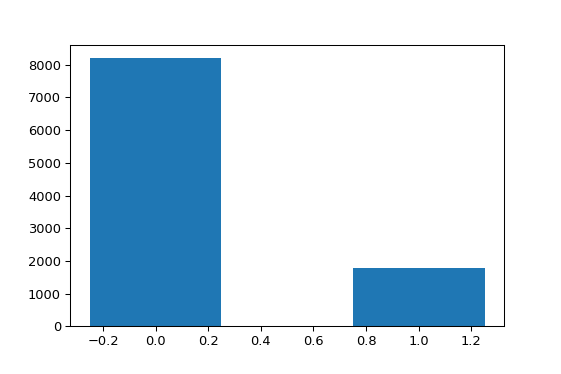

<BarContainer object of 2 artists>

In [35]:
# bar distribution

xvals = [0,1]

plt.figure()
plt.bar(xvals,[ones , zeros], width = 0.5)


**HISTOGRAM**

<IPython.core.display.Javascript object>


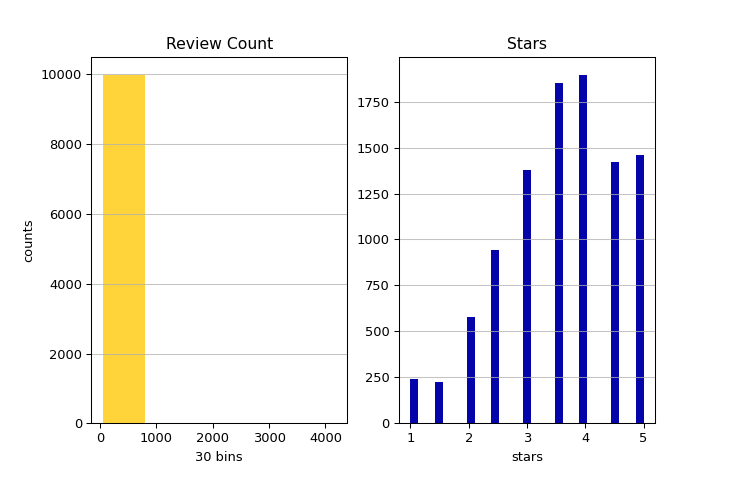

Text(0.5, 1.0, 'Stars')

In [56]:
plt.figure()

plt.subplot(1, 2, 1)  
plt.hist(X_df['review_count'],bins=5,color='#FFD43B',rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('counts')
plt.xlabel('30 bins')
plt.title('Review Count')


plt.subplot(1, 2, 2)  
plt.hist(X_df['stars'],bins='auto',color='#0504aa')
plt.grid(axis='y', alpha=0.75)
#plt.ylabel('counts')
plt.xlabel('stars')
plt.title('Stars')


<IPython.core.display.Javascript object>


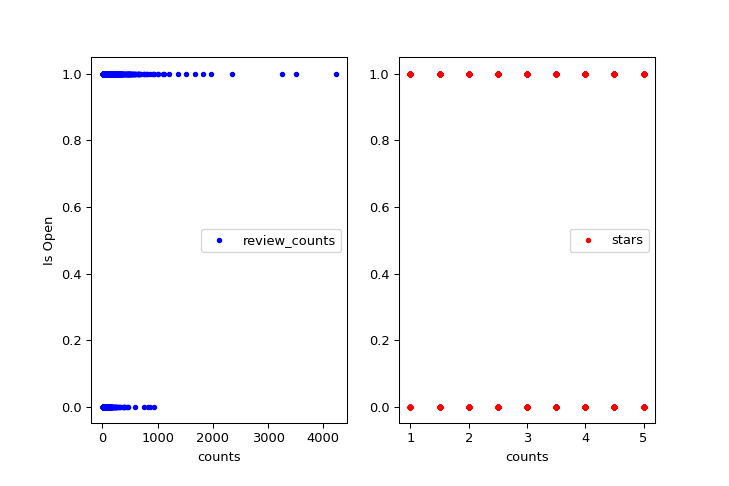

In [79]:
# New figure 
# clustering 

# X: 'review_count', 'stars'
# y: 'is_open'

plt.figure()
# ------(row,col,fig num.)
plt.subplot(1, 2, 1)  
plt.scatter(X_df["review_count"],y_df['is_open'],s=10,c='blue',label='review_counts')
plt.xlabel('counts')
plt.ylabel('Is Open')
plt.legend(loc='center right', frameon=True)

plt.subplot(1, 2, 2)  
plt.scatter(X_df["stars"],y_df['is_open'],s=10,c='red',label='stars')

plt.xlabel('counts')
plt.legend()

In [75]:
#  mean of X feature matrix
# ------(axis=0) : column mean

print("mean values \n {}".format(X_df.mean()))

mean values
review_count    32.2181
stars            3.6010
dtype: float64


In [83]:
# min value
print("Min value \n {}".format(X_df.min()))

print(" ")

# max value
print("Max value \n {}".format(X_df.max()))

Min value 
 review_count    3.0
stars           1.0
dtype: float64
 
Max value 
 review_count    4227.0
stars              5.0
dtype: float64


## Linear Regression Without Feature Engineering

### Adding the Offset value

In [11]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_count  10000 non-null  int64  
 1   stars         10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [14]:
ones = [1]*10000


In [22]:
X_df.insert(0,'ones',ones,True)
X_df.head()

,ones,review_count,stars
0,1,5,3.0
1,1,128,2.5
2,1,170,4.0
3,1,3,5.0
4,1,4,4.0


In [24]:
# Take a Look
# Look at first 10 rows of X and y
print("Label: ", y_df.loc[:10,:], "\nFeatures:", X_df.loc[:10,:])

Label:      is_open
0         0
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         0
9         1
10        1 
Features:     ones  review_count  stars
0      1             5    3.0
1      1           128    2.5
2      1           170    4.0
3      1             3    5.0
4      1             4    4.0
5      1             3    2.5
6      1             7    3.5
7      1             3    3.5
8      1             8    5.0
9      1             8    4.5
10     1             5    2.0


### Training Data

Deviding the train and test data

In [25]:
from sklearn.model_selection import train_test_split
# rabdom state for reproducible data alaisis
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)

### Model

In [27]:
y_train = y_train.values.ravel() # To reshape
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [31]:
predictions = model.predict(X_test)

In [32]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
correctPredictions = (predictions == y_test.values.ravel())
correctPredictions

array([False,  True, False, ...,  True,  True,  True])

### Performance

Metric: 

$$
    \frac{\sum_{i=1}^N \text{correct predictions}}{\text{Total Predictions}}
$$

In [34]:
# True values are 1's, and False values are 0's

sum(correctPredictions) / len(correctPredictions)

0.8248484848484848

In [35]:
# Sklear Score
model.score(X_test,y_test)

0.8248484848484848

In [36]:
# metrics.accuracy_score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8248484848484848

## Off - Set Values

The scatter plot and histogram above displays the fact that there are *business' review count(s)* with a bias. 

**Proposal to eliminating the off-set values**

* Because the mean is **32** then lets elimite all the *business* with more than **64** reviews.
* Normalize the data column *review count* to the max value of the new data set

Retrieving all the values:

In [116]:
df = pd.DataFrame(data, columns=["business_id", 
                            "name",
                            "address",
                            "city",
                            "state",
                            "postal_code",
                            "latitude",
                            "longitude",
                            "stars",
                            "review_count",
                            "is_open",
                             "attributes"])

mask = ( df['review_count'] < 64 )

print(mask) 
print(" ")
print(sum(mask))

0        True
1       False
2       False
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: review_count, Length: 10000, dtype: bool
 
8910


Implementing the **Boolean Mask** and re-indexing the df 

In [117]:
df = df[mask]
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'}
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint..."
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street..."
6,5JucpCfHZltJh5r1JabjDg,Edgeworxx Studio,20 Douglas Woods Drive Southeast,Calgary,AB,T2Z 1K4,50.943646,-114.001828,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki..."


In [118]:
df.reset_index(drop=True)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'}
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,
2,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint..."
3,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street..."
4,5JucpCfHZltJh5r1JabjDg,Edgeworxx Studio,20 Douglas Woods Drive Southeast,Calgary,AB,T2Z 1K4,50.943646,-114.001828,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8905,KX4A_sLnu1kz55Bi00flAQ,City Stop Six Carwash,3240 N Durango Dr,Las Vegas,NV,89129,36.219236,-115.278133,3.0,3,1,
8906,yir2ft05Ct4MuMSLJeyA2g,Wet Seal,7400 Las Vegas Blvd S Ofc,Las Vegas,NV,89123,36.035749,-115.153343,2.0,3,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep..."
8907,gyKPacdR-Mu8MLIzJ-PGrQ,Open Top Sightseeing-Las Vegas,2101 Western Ave,Las Vegas,NV,89102,36.148016,-115.164513,3.0,4,1,
8908,qNaOJpBs1q_Adjm3-CPdgA,Fine Skin Care,"28 Finch Avenue W, Unit 109",Toronto,ON,M2N 2G7,43.779707,-79.418050,4.0,4,1,"{'ByAppointmentOnly': 'True', 'WheelchairAcces..."


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8910 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   8910 non-null   object 
 1   name          8910 non-null   object 
 2   address       8910 non-null   object 
 3   city          8910 non-null   object 
 4   state         8910 non-null   object 
 5   postal_code   8910 non-null   object 
 6   latitude      8910 non-null   float64
 7   longitude     8910 non-null   float64
 8   stars         8910 non-null   float64
 9   review_count  8910 non-null   int64  
 10  is_open       8910 non-null   int64  
 11  attributes    8910 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 904.9+ KB


#### Feature Matrix and Label Matrix

Getting *X Feature Matrix* and *Y label Matrix*

In [120]:
# Get review_Counts and Stars

X_df=df[['review_count', 'stars']]
y_df = df[['is_open']]

print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8910 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_count  8910 non-null   int64  
 1   stars         8910 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 208.8 KB
None


In [121]:
X_df.review_count.max()

63

#### Normalizing: 

*Apply* mehtod from pandas

df['Review_count'] / 64 

In [122]:
X_df['review_count'] = X_df['review_count'].apply(lambda x: x / 63)

<ipython-input-122-a8815a1d5a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['review_count'] = X_df['review_count'].apply(lambda x: x / 63)


In [124]:
X_df.head()

,review_count,stars
0,0.079365,3.0
3,0.047619,5.0
4,0.063492,4.0
5,0.047619,2.5
6,0.111111,3.5


Histogram:

<IPython.core.display.Javascript object>


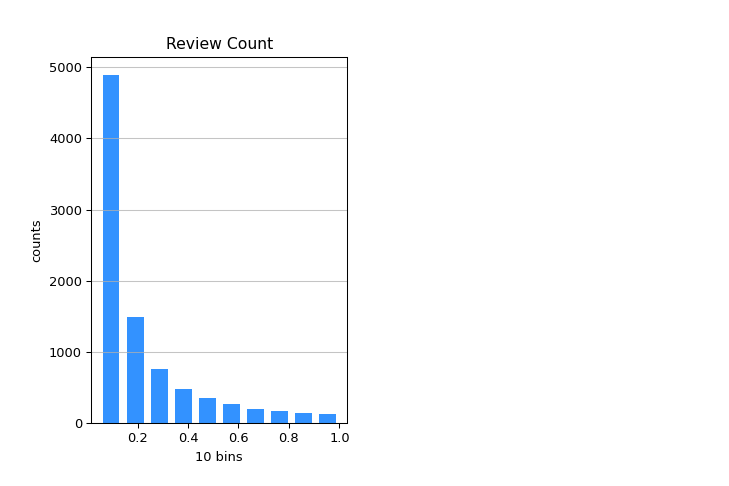

Text(0.5, 1.0, 'Review Count')

In [138]:
plt.figure()

plt.subplot(1, 2, 1)  
plt.hist(X_df['review_count'],bins=10,color='#3392FF',rwidth=0.7)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('counts')
plt.xlabel('10 bins')
plt.title('Review Count')

### Applying the Logistic Regression Protocol

In [126]:
print(len(X_df.index))

8910


In [128]:
# Off-set X feature Matrix

ones = [1]*len(X_df.index)
X_df.insert(0,'ones',ones,True)

# deviding the Test and Train data
# random_state= 23

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)

# Re-shape  Y vector
y_train = y_train.values.ravel() 

**Calling and Testing the Model**

In [129]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predictions**

In [131]:
predictions = model.predict(X_test)

**Scores**

In [132]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8140088405304319

#### Conclusion:

Because there is a equivanly distribution of the off-set values from the **review count** column, the results are nort affecter; yet, the reduction in the data set may improve time for processing the model

## Nearest Neighbors

#### Documentation

* https://scikit-learn.org/stable/modules/neighbors.html#classification
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

